# Sentiment Analysis With Imdb Dataset

Sentiment analysis is one of the most significant topics of Machine Learning era. We usually classify numerical values easily, what if we have some text as data? Sentiment analysis comes to playground when we across with such situations.

For instance, Reading user commands and rates are what you are looking for before going a movie. For this reason, in this notebook we will automatize the process of looking at each command and determine whether is it good or bad using Sentiment Analysis.

### Implementing Required Modules

In [ ]:
from keras.datasets import imdb
import numpy as np
from keras import models, layers, regularizers
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
import time

### Loading imdb dataset with most common words:

* `num_words` parameter takes a number to return most common words in commands. In this case it is 10000.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

* All words in commands replaced with index which is uniquelly assigned for each word
* Both train and test data consist of array of list in 25000 samples

In [ ]:
print("Train data shape:", train_data.shape)
train_data

Train data shape: (25000,)


array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

* Labels only cover 1s and 0s which is represented for good or bad command respectively

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

* imdb dataset also has `get_word_index` built in function which returns words as keys and indices as values.
* Lets reverse words and corresponding indices to observe an example

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for key, value in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[4]])

In [ ]:
decoded_review

"? worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the ? and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life"

### Data Pre-processing

In the code cells below:

* In order to convert array of lists to one-hot encoded data we created an empty 10000 dimensional matrix which each row corresponds to a sample.

* Then, notice that in this example we set the word index 1 without incrementing it. Thus, we are only looking for which word used instead of how many times single word is used.

* Moreover, each list keeps word orders with their indices when data loaded in first time. However, we are not inderested with word order now, we are only looking for which words make the command good or bad.

In [ ]:
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

### Creating and Evaluating Models

* Initially, we used 2 dense layer with 16 units and relu activation function.
* We chose Rmsprop as optimizer and accuracy as evaluation metrix

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Lets define 10000 sample as validation set. At the end, we have 15000 training, 10000 validation and 25000 test sample

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4849 - accuracy: 0.7913 - val_loss: 0.3585 - val_accuracy: 0.8727
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2829 - accuracy: 0.9064 - val_loss: 0.3190 - val_accuracy: 0.8703
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2095 - accuracy: 0.9296 - val_loss: 0.2800 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1654 - accuracy: 0.9467 - val_loss: 0.2951 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1347 - accuracy: 0.9565 - val_loss: 0.3148 - val_accuracy: 0.8756
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1111 - accuracy: 0.9654 - val_loss: 0.3009 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0956 - accuracy: 0.9706 - val_loss: 0.3222 - val_accuracy: 0.8830
Epoch 8/20
30

We can achieve the model history dictionary using `history.history` that allows us to evaluate model with visualization.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

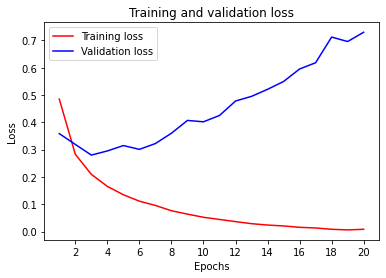

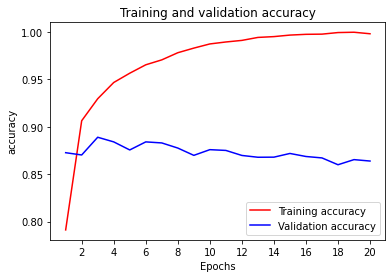

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.xticks(range(0, 22, 2))
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.xticks(range(0, 22, 2))
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

* When we observe the plots above, we can see that model strongly tents to overfit after 4th epochs.

* In 20th epoch we got 1. training and 0.86 test validation

* Lets train the model with 4 epoch again and evaluate the test result.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=4, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 1s 30ms/step - loss: 0.5252 - accuracy: 0.7834 - val_loss: 0.4051 - val_accuracy: 0.8662
Epoch 2/4
30/30 [==============================] - 1s 20ms/step - loss: 0.3125 - accuracy: 0.9043 - val_loss: 0.3088 - val_accuracy: 0.8879
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.2271 - accuracy: 0.9264 - val_loss: 0.2782 - val_accuracy: 0.8915
Epoch 4/4
30/30 [==============================] - 1s 19ms/step - loss: 0.1765 - accuracy: 0.9419 - val_loss: 0.2728 - val_accuracy: 0.8902


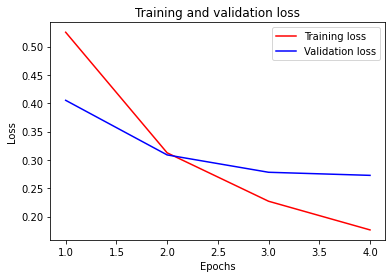

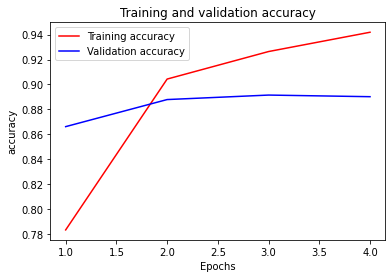

In [ ]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, 5)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

* In this case we got 0.94 train accuracy and 0.89 for test accuracy and now, we stopped model before overfit much

In [ ]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.2938 - accuracy: 0.8821


[0.29376304149627686, 0.8821200132369995]

### Exploring Regularization and Dropout:

* In this setting we are going to apply l2 regularizer and dropout in model to prevent overfitting

#### L2 Regularizer

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=4, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 1s 31ms/step - loss: 0.6428 - accuracy: 0.6887 - val_loss: 0.5542 - val_accuracy: 0.8093
Epoch 2/4
30/30 [==============================] - 1s 20ms/step - loss: 0.4845 - accuracy: 0.8701 - val_loss: 0.4481 - val_accuracy: 0.8771
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.3824 - accuracy: 0.9052 - val_loss: 0.3852 - val_accuracy: 0.8836
Epoch 4/4
30/30 [==============================] - 1s 19ms/step - loss: 0.3240 - accuracy: 0.9175 - val_loss: 0.3563 - val_accuracy: 0.8869


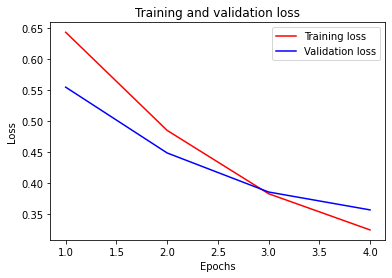

In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.3675 - accuracy: 0.8828


[0.3674747347831726, 0.8827999830245972]

* L2 regularizer has generalized learning a bit with getting closer train and validation loss

#### DropOut

Dropout simply works as randomly closing units with given probability in a layer. Sufficiently using Dropout allows us to ignore some patters specific for training set and generalize model well. Using more Dropout with high probability may hurt the performace.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=4,
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 1s 28ms/step - loss: 0.5952 - accuracy: 0.6931 - val_loss: 0.4744 - val_accuracy: 0.8486
Epoch 2/4
30/30 [==============================] - 1s 19ms/step - loss: 0.4401 - accuracy: 0.8327 - val_loss: 0.3680 - val_accuracy: 0.8797
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.3567 - accuracy: 0.8747 - val_loss: 0.3165 - val_accuracy: 0.8848
Epoch 4/4
30/30 [==============================] - 1s 18ms/step - loss: 0.2959 - accuracy: 0.8985 - val_loss: 0.2871 - val_accuracy: 0.8932


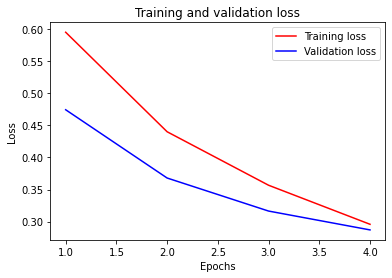

In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* However, it seems single dropout penalized model better than l2 regularizer since train and validation losses almost same after 4 epoch without hurting the test performance

In [ ]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.3004 - accuracy: 0.8844


[0.30043020844459534, 0.8844000101089478]

In Conclusion,

We evaluated imdb dataset using only the most commanly used 10000 words with sentiment analysis and it gave us very promising result in the beginning. We will also evaluate this dataset later using more advanced tools.